# 로지스틱 회귀
- 선형 회귀 방식을 분류에 적용한 알고리즘

## 로지스틱 회귀 변환 과정
- 승산비(Odds)  
$\text{Odds} = \dfrac{p}{1-p}$, where $p=w_0+w_1x_1+...+w_nx_n$
- 로짓(Logit) 함수  
$\log(\text{Odds})=\log \left(\dfrac{p}{1-p} \right)$
- 역함수
$\text{logistic}(x)=\dfrac{e^x}{1+e^x}$

## 로지스틱 회귀모델
- 로짓 함수에 일반 선형 회귀 적용  
$l = \log \left(\dfrac{p}{1-p} \right) = w_0+w_1x_1+...+w_nx_n \\
p = \dfrac{e^{w_0+w_1x_1+...+w_nx_n}}{1+e^{w_0+w_1x_1+...+w_nx_n}}$

### 유방암 예측(분류)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
data_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

In [3]:
data_df.shape

(569, 30)

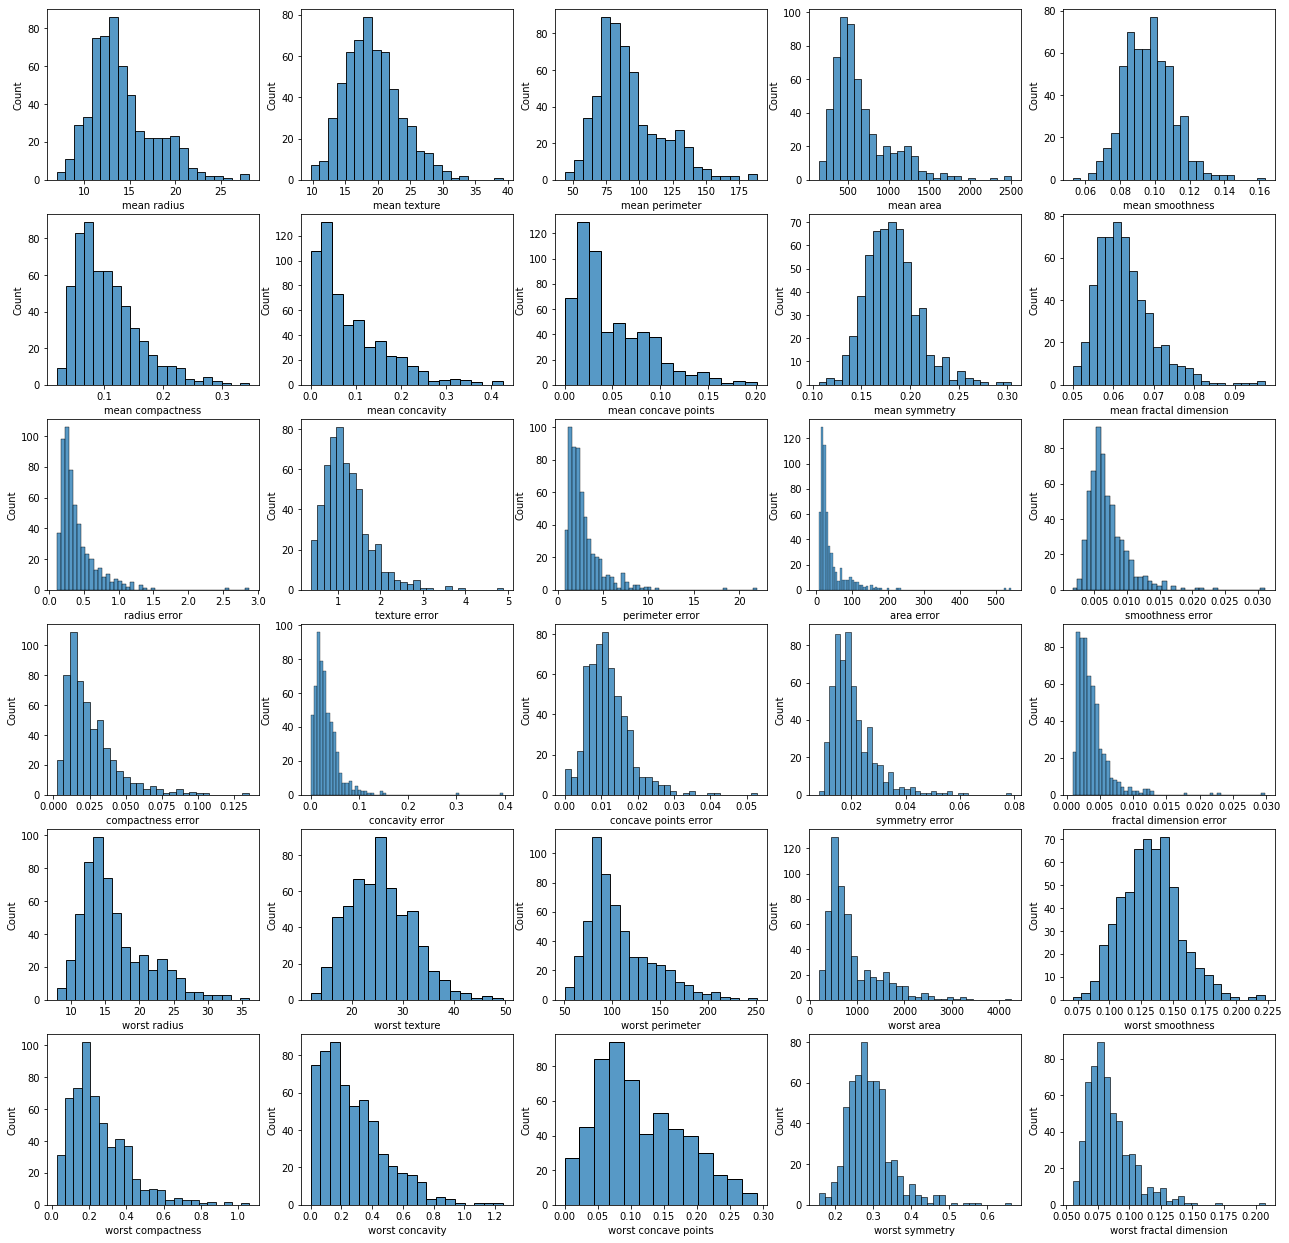

In [6]:
import seaborn as sns
fig, axs = plt.subplots(figsize=(22, 22), ncols=5, nrows=6)

for i, feature in enumerate(cancer.feature_names):
    row = i//5
    col = i%5
    sns.histplot(data_df[feature], ax=axs[row][col])

### 표준화
- 로지스틱 회귀는 데이터의 정규 분포도에 따라 예측 성능에 영향이 큼

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target,
                                                      test_size=0.3, random_state=0)

### 학습, 평가

In [8]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy: 0.977
roc_auc: 0.972


### 하이퍼 파라미터 튜닝

In [13]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

params={'penalty':['l2', 'l1', 'elasticnet'],
        'C':[0.01, 0.1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print(f'최적 하이퍼 파라미터 : {grid_clf.best_params_}, 최적 평균 정확도 : {grid_clf.best_score_:.3f}')

최적 하이퍼 파라미터 : {'C': 1, 'penalty': 'l2'}, 최적 평균 정확도 : 0.975
